In [1]:
# Import all necessary libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split,RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


# Data Exploration

In [2]:
# Load data
data = pd.read_csv("./dataset.csv")
data = data.astype(int)
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


Features and Label

In [3]:
X=data.drop(['Diabetes_012'], axis=1)
y=data['Diabetes_012']
X.shape

(253680, 21)

Train/test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

Feature selection with RF

In [5]:
temp_rdf = RandomForestClassifier(class_weight='balanced', random_state=42)
temp_rdf.fit(X_train, y_train)

# Create importance_df
importances = temp_rdf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

scores = []
k_list = list(range(1, 21))
for k in k_list:
    selected_features = importance_df['Feature'].head(k).values
    X_train_selected = X_train[selected_features]
    
    model = RandomForestClassifier(class_weight='balanced', random_state=42)
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='f1_macro')
    scores.append(np.mean(cv_scores))

# Find best k
best_k = k_list[np.argmax(scores)]
print(f"Best k: {best_k}, Best score: {max(scores)}")


Best k: 8, Best score: 0.39852736906696873


In [6]:
top_features = importance_df['Feature'].head(best_k).values
print(f"Top {best_k} features: {top_features}")
X_best_features = X[top_features]


Top 8 features: ['BMI' 'Age' 'Income' 'PhysHlth' 'Education' 'GenHlth' 'MentHlth' 'HighBP']


In [7]:
# Split training/test
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best_features, y, test_size=0.2, random_state=42, stratify=y)


Let's try grid search to find the best parameters

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   9.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   9.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   9.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   9.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   9.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

/Users/miniconda3/envs/jupyter/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=  16.9s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  33.5s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  33.6s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=  16.7s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  33.7s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  33.8s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=  16.6s
[CV] END bootstrap=True, max_depth=15, max_featu

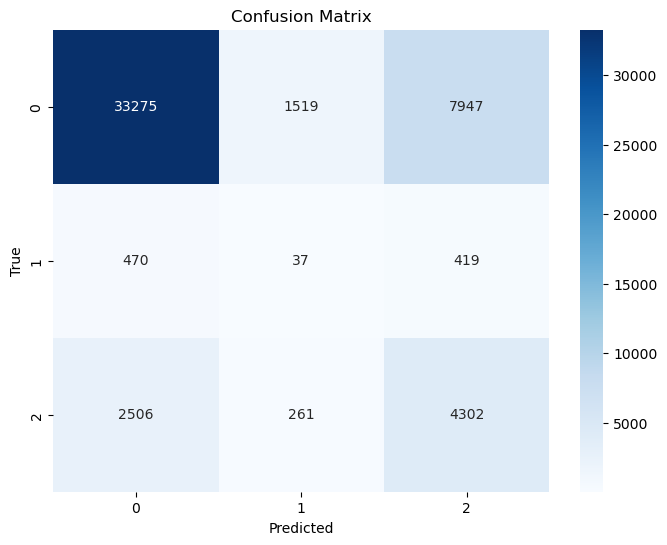

In [8]:

# === Combined hyperparameter grid ===
param_grid = {
    'n_estimators': [150, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
# === Grid Search ===
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    scoring='f1_macro',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1
)

# === Fit search on full training set ===
grid_search.fit(X_train_best, y_train_best)

# === Evaluate on hold-out test set ===
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_best)
y_proba = best_model.predict_proba(X_test_best)

# === Confusion Matrix ===
cm = confusion_matrix(y_test_best, y_pred, labels=[0, 1, 2])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig("output/confusion_matrix_RF_with_FS_after_grid_search.png", dpi=500, bbox_inches='tight')

# === Metrics ===
print("Best parameters from tuning:", grid_search.best_params_)
print("Best CV score (macro F1):", grid_search.best_score_)
print("Accuracy:", accuracy_score(y_test_best, y_pred))
print("Precision (macro):", precision_score(y_test_best, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test_best, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test_best, y_pred, average='macro'))
print("\nClassification Report:\n")
print(classification_report(y_test_best, y_pred, digits=4))


Now I use these parameters and these features, but using the training set for the evaluation, in order to look if there is an overfitting

In [9]:
# Train Random Forest
rf_model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=300,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True
)
rf_model.fit(X_train_best, y_train_best)

# Predict on training
y_train_pred = rf_model.predict(X_train_best)

# Probabilities
y_train_proba = rf_model.predict_proba(X_train_best)

# Evaluation Metrics
print("Training Set Performance")
print("Accuracy:", accuracy_score(y_train_best, y_train_pred))
print("Precision (macro):", precision_score(y_train_best, y_train_pred, average='macro'))
print("Recall (macro):", recall_score(y_train_best, y_train_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_train_best, y_train_pred, average='macro'))
print("\nClassification Report:\n")
print(classification_report(y_train_best, y_train_pred, digits=4))

Training Set Performance
Accuracy: 0.8153776411226742
Precision (macro): 0.5945100005747234
Recall (macro): 0.858114621664465
F1 Score (macro): 0.6614929356050763

Classification Report:

              precision    recall  f1-score   support

           0     0.9736    0.8090    0.8837    170962
           1     0.3435    0.9258    0.5011      3705
           2     0.4664    0.8396    0.5997     28277

    accuracy                         0.8154    202944
   macro avg     0.5945    0.8581    0.6615    202944
weighted avg     0.8914    0.8154    0.8371    202944



I try however with all the features the same grid search, just to see if features selection actually helps in this case

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  12.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  12.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  12.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  12.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=  12.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  16.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

/Users/miniconda3/envs/fods/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  52.6s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=  25.8s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  52.3s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  52.2s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=  25.2s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=150; total time=  25.4s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  33.9s
[CV] END bootstrap=True, max_depth=15, max_f

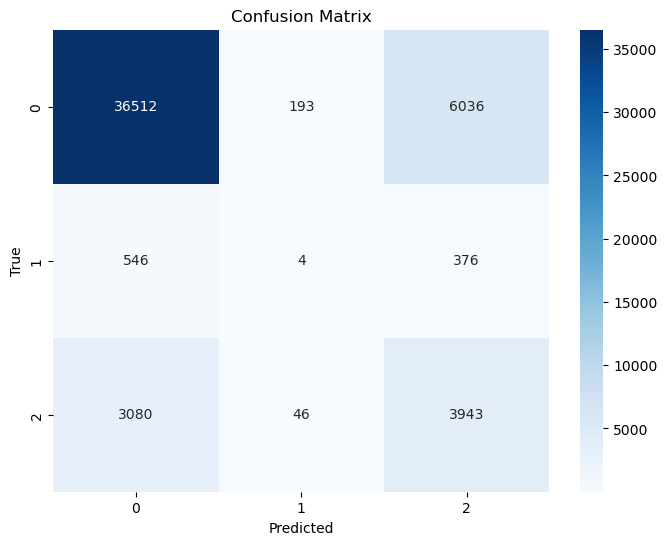

In [26]:
# === Combined hyperparameter grid ===
param_grid = {
    'n_estimators': [150, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# === Grid Search ===
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    scoring='f1_macro',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1
)

# === Fit search on full training set ===
grid_search.fit(X_train, y_train)

# === Evaluate on hold-out test set ===
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig("output/confusion_matrix_RF_after_grid_search.png", dpi=500, bbox_inches='tight')

# === Metrics ===
print("Best parameters from tuning:", grid_search.best_params_)
print("Best CV score (macro F1):", grid_search.best_score_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))